<img src='https://media-exp1.licdn.com/dms/image/C560BAQFgHU3sTF4LfQ/company-logo_200_200/0/1519895156650?e=2147483647&v=beta&t=e6J4j8gWdNCJ-Dhu6xEC2S3EB_6lcim27ymu6-zRQkg'>

# Task 6 
# The Spark Foundation
# Supervised ML Decision Tree Classifier(Intermidiate)
# Made By - Bishal Kumar Das

In [1]:
#importing all requered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [2]:
#storing data in df variable
df=pd.read_csv('Iris.csv')

In [3]:
#top 5 rows of the data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#count of different Species
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
#checking datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#changing species classification from string to int
df['Species']=LabelEncoder().fit_transform(df['Species'])

In [7]:
df.shape

(150, 6)

# splitting data and removing outliers

In [8]:
#splitting data into dependent and independent variable
x=df.drop('Species',axis=1)
y=df[['Species']]

In [9]:
#splitting data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=0)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


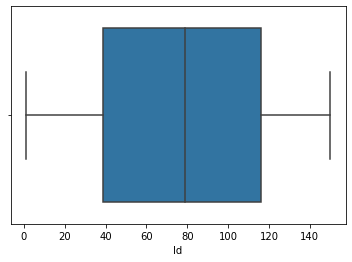

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


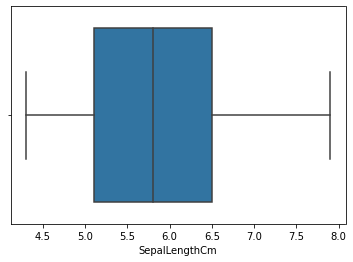

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


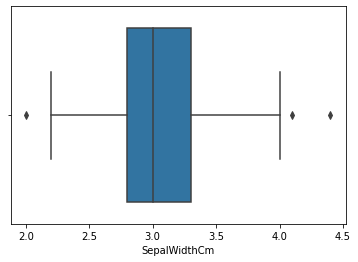

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


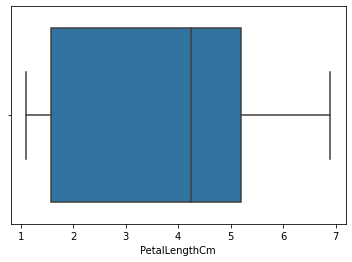

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


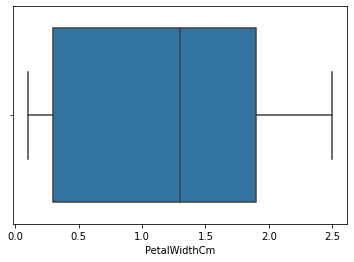

In [10]:
#checking the outliers in train data
for i in x_train:
    sns.boxplot(x_train[i])
    plt.show()

In [11]:
#we have some outliers in sepal width
#caping outliers function
def capping_outlier(data):
    for i in data:
        if data[i].nunique()<=2:
            pass
        else:
            sns.boxplot(data[i])
            plt.title('before')
            plt.show()
            q1,q3=np.percentile(data[i],[25,75])
            IQR=q3-q1
            lower=q1-1.5*IQR
            upper=q3+1.5*IQR
            data[i]=np.where(data[i]>upper,upper,np.where(data[i]<lower,lower,data[i]))
            sns.boxplot(data[i])
            plt.title('after')
            plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


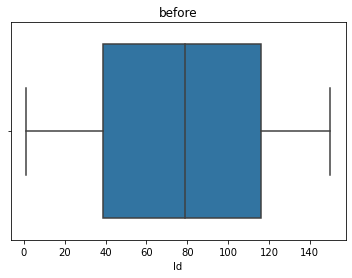

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


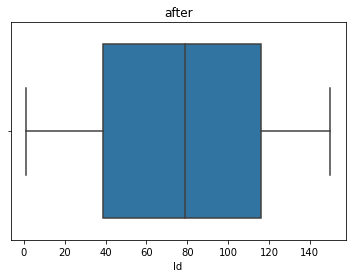

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


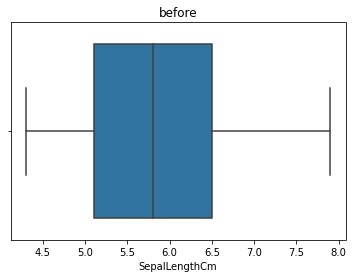

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


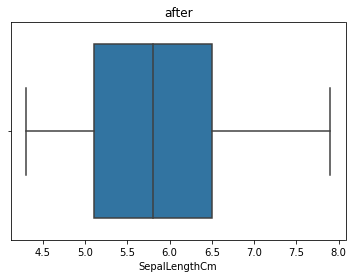

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


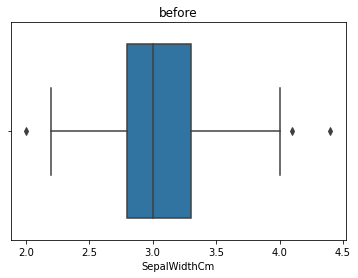

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


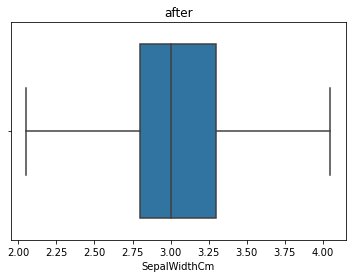

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


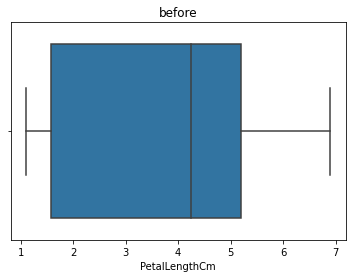

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


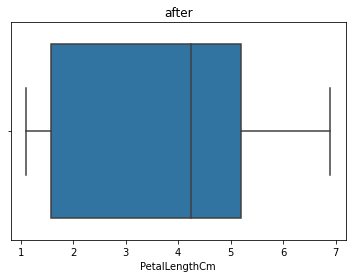

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


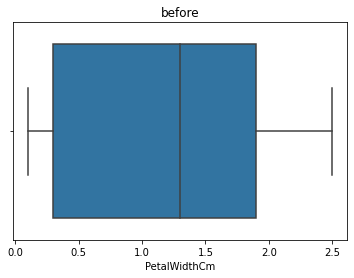

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


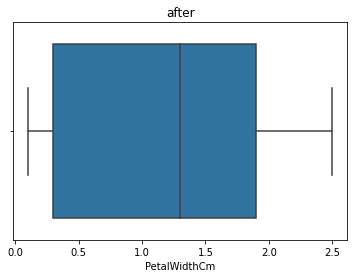

In [12]:
capping_outlier(x_train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


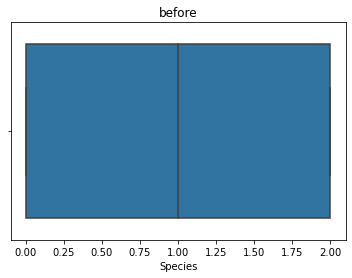

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


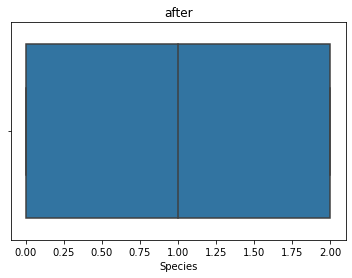

In [13]:
capping_outlier(y_train)

# Decision tree classification

In [14]:
Classifier=DecisionTreeClassifier(random_state=0)

In [15]:
#fitting train data in decision tree classifier function
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
#predicting y by x_test data
y_pred=Classifier.predict(x_test)

In [17]:
#cheking the accuracy
accuracy=accuracy_score(y_test,y_pred)
#cheching confision matrix
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix  \n',cm)
print('accuracy  \n',accuracy)

confusion matrix  
 [[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
accuracy  
 0.9736842105263158


In [18]:
#checking under and over sampling
Classifier.score(x_test,y_test)

0.9736842105263158

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


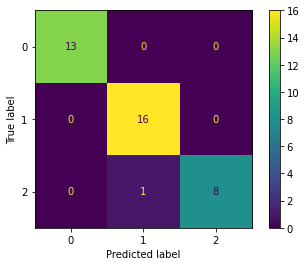

In [19]:
plot_confusion_matrix(Classifier,x_test,y_test)

[Text(0.6, 0.8333333333333334, 'Id <= 101.0\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.4, 0.5, 'PetalWidthCm <= 0.8\ngini = 0.499\nsamples = 71\nvalue = [37, 34, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

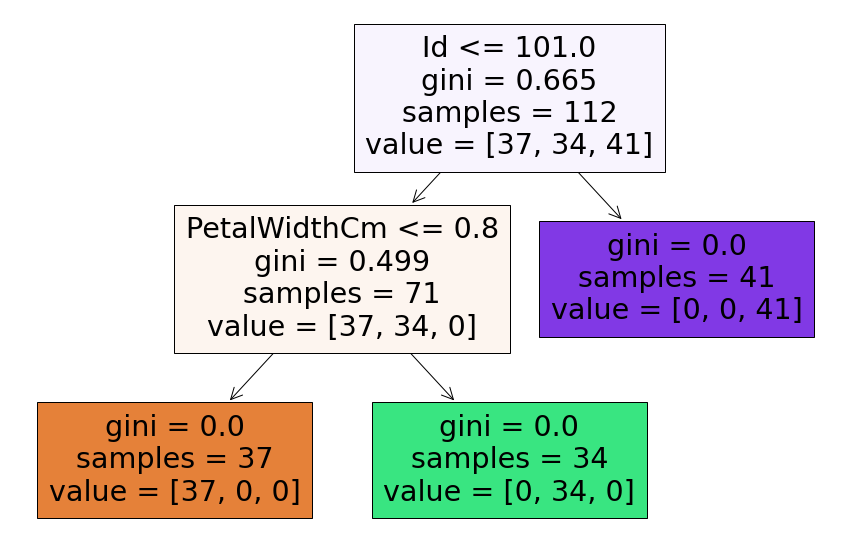

In [20]:
plt.figure(figsize=(15,10))
plot_tree(Classifier,filled=True,feature_names=x_train.columns)


<img src='https://t3.ftcdn.net/jpg/02/91/52/22/360_F_291522205_XkrmS421FjSGTMRdTrqFZPxDY19VxpmL.jpg'>